<a href="https://colab.research.google.com/github/MAR123EREE/Laboratorio_02/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO

In [57]:
# utilizado para la manipulación de directorios y rutas
import os
# Libreria para graficos
from matplotlib import pyplot

# Cálculo científico y vectorial para python
import numpy as np
# Modulo de optimizacion en scipy
#from scipy import optimize

# modulo para cargar archivos en formato MATLAB
#from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset original

In [59]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784
# 10 etiquetas, de 0 a 9 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10
# Cargar el dataset MNIST desde Google Drive
# Importar la libreria pandas y asignarle el alias 'pd'
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_sets/Lab_04/mnist_train.csv', delimiter=',')

# Separar los datos de entrada (X) y las etiquetas (y)
X = data.iloc[:, 1:]  # Todas las columnas desde la segunda (datos de píxeles)
y = data.iloc[:, 0]   # La primera columna contiene las etiquetas

# Revisar si el valor 10 está en las etiquetas (no debería estar)
y[y == 10] = 0  # Si encuentras algún 10, reasígnalo como 0
m = y.size

# Mostrar los primeros datos
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Define una función llamada displayData que toma tres parámetros: X (los datos a mostrar), example_width (ancho de cada ejemplo) y
#figsize (tamaño de la figura).
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    #Verifica la dimensionalidad de X y ajusta m (número de ejemplos)
    #y n (número de características). Si X es un vector, lo convierte en una matriz bidimensional.
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')
    #Calcula el ancho de cada ejemplo si no se proporciona (example_width) y calcula la altura de cada ejemplo (example_height)
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el número de filas (display_rows) y columnas (display_cols) necesarias para mostrar los datos en una cuadrícula.
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    #Crea una figura y una matriz de ejes (ax_array) con el tamaño especificado (figsize). Ajusta el espacio entre los subgráficos.
    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    #Asegura que ax_array sea una lista si hay solo un ejemplo, o aplana la matriz de ejes si hay múltiples ejemplos.
    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

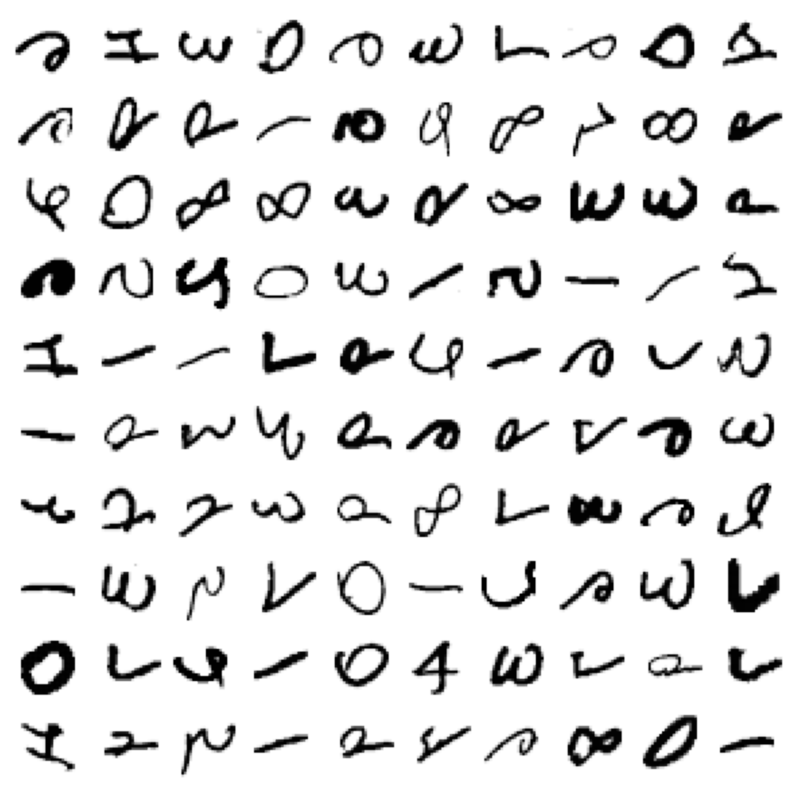

In [28]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X.iloc[rand_indices, :].values # Use .iloc to select rows and columns by integer location

displayData(sel)

DATASET SINTÉTICO

ID de la Imagen: Una columna que contenga un identificador único para cada imagen. Esta puede ser útil para rastrear y referenciar imágenes específicas.

Fecha de Creación: Una columna que registra la fecha y hora en que la imagen fue creada o añadida al dataset. Esto puede ser útil para análisis temporales o para mantener un registro como en un historial.

Fuente del Dato: Una columna que indique la fuente de la imagen, como el dispositivo o la persona que la creó. Esto puede ser útil para análisis de calidad o para comprender la variabilidad en los datos.

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Crear un DataFrame de ejemplo con las columnas originales de MNIST
data = pd.DataFrame(np.random.randint(0, 256, size=(100, 784)), columns=[f'Pixel{i+1}' for i in range(784)])
data['Label'] = np.random.randint(0, 10, size=(100,))

# Añadir la columna 'ImageID'
data['ImageID'] = [f'{i:05d}' for i in range(len(data))]

# Añadir la columna 'CreationDate'
data['CreationDate'] = [datetime.now().strftime('%Y-%m-%d %H:%M:%S') for _ in range(len(data))]

# Añadir la columna 'DataSource'
data['DataSource'] = np.random.choice(['Scanner1', 'UserA', 'UserB'], size=(100,))

# Reordenar las columnas para que las nuevas estén al principio
mnist_data = data[['ImageID', 'CreationDate', 'DataSource', 'Label'] + [f'Pixel{i+1}' for i in range(784)]]

# Duplicar el DataFrame existente
duplicated_data = mnist_data.copy()

# Modificar el 'ImageID' para evitar duplicados, añadiendo un prefijo "D-" para los duplicados
duplicated_data['ImageID'] = ['D-' + image_id for image_id in duplicated_data['ImageID']]

# Modificar 'CreationDate' sumando minutos aleatorios para simular una nueva creación
duplicated_data['CreationDate'] = pd.to_datetime(duplicated_data['CreationDate']) + pd.to_timedelta(np.random.randint(1, 60, size=(len(duplicated_data))), unit='m')
duplicated_data['CreationDate'] = duplicated_data['CreationDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Modificar 'DataSource' aleatoriamente para simular otra fuente de origen (puede quedar igual en algunos casos)
duplicated_data['DataSource'] = np.random.choice(['Scanner1', 'UserA', 'UserB'], size=(100,))

# Concatenar los datos originales y duplicados
final_data = pd.concat([mnist_data, duplicated_data], ignore_index=True)

# Reordenar las columnas para que las nuevas estén al principio
final_data = final_data[['ImageID', 'CreationDate', 'DataSource', 'Label'] + [f'Pixel{i+1}' for i in range(784)]]

# Guardar el dataset extendido
final_data.to_csv('mnist_extended_synthetic.csv', index=False)

print("Dataset duplicado y extendido creado exitosamente.")

Dataset duplicado y extendido creado exitosamente.


In [40]:
final_data.head()

,ImageID,CreationDate,DataSource,Label,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,00000,2024-09-19 11:57:02,UserA,0,137,140,188,232,106,130,...,11,49,10,126,117,13,62,31,226,212
1,00001,2024-09-19 11:57:02,Scanner1,4,224,21,204,12,118,140,...,12,122,70,14,249,154,23,86,253,76
2,00002,2024-09-19 11:57:02,Scanner1,7,94,151,44,83,9,250,...,91,118,36,203,204,47,169,138,122,83
3,00003,2024-09-19 11:57:02,Scanner1,0,107,218,248,207,14,44,...,184,211,106,228,202,203,190,143,194,183
4,00004,2024-09-19 11:57:02,UserA,6,116,106,105,145,83,239,...,160,239,188,104,201,63,134,85,60,154


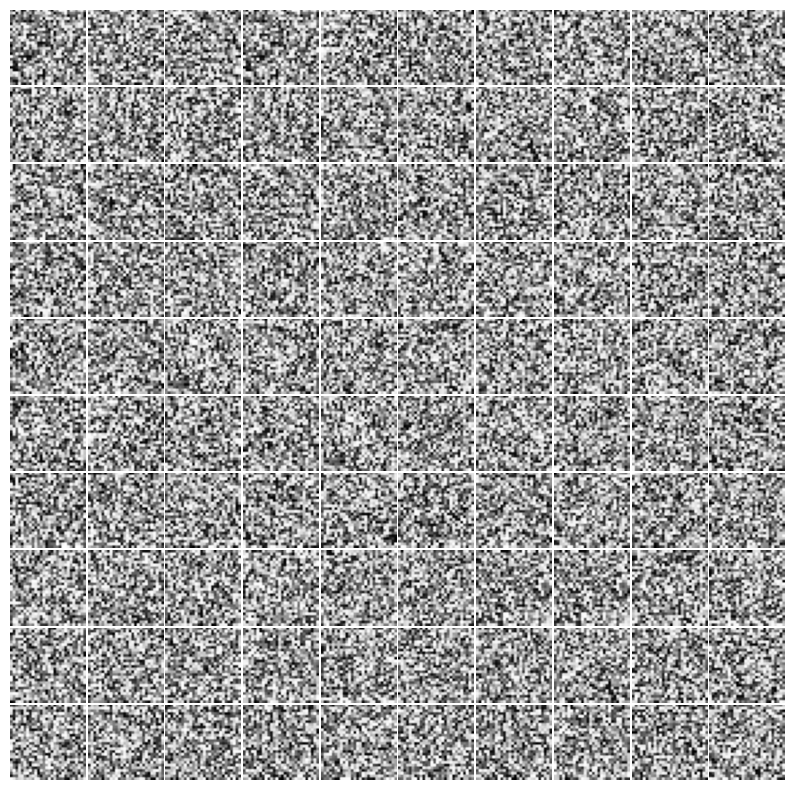

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def displayData(X, example_width=28, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    m, n = X.shape
    example_height = n // example_width  # Altura de cada ejemplo

    # Calcular el número de filas y columnas para la cuadrícula
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Crear la figura con subplots
    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
    ax_array = ax_array.ravel()  # Aplanar matriz de ejes para un acceso fácil

    for i, ax in enumerate(ax_array):
        if i >= m:
            ax.axis('off')
            continue
        img = X[i].reshape(example_height, example_width, order='F')
        ax.imshow(img, cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

    plt.show()

# Cargar el dataset
data = pd.read_csv('mnist_extended_synthetic.csv')

# Seleccionar columnas de píxeles
pixel_columns = [col for col in data.columns if col.startswith('Pixel')]
X_pixels = data[pixel_columns].values

# Seleccionar 100 ejemplos aleatorios
# Selecciona aleatoriamente 100 puntos de datos para mostrar
sel = X_pixels[np.random.choice(X_pixels.shape[0], 100, replace=False), :]

# Mostrar los ejemplos seleccionados
displayData(sel)

Dividir el dataset sintetico

In [51]:
# Funcion train_test_split, que recibe X y y, test_size es el tamaño de prueba
#Aqui depende de cuanta parte del cod debe ser de prueba y entenamiento
import numpy as np

def train_test_split(X_pixels, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    # Mezclar los datos
    indices = np.arange(X_pixels.shape[0])
    np.random.shuffle(indices)

    # Calcular el tamaño del conjunto de prueba
    test_size = int(len(X_pixels) * test_size)

    # Dividir los datos
    X_train = X_pixels[indices[:-test_size]]
    X_test = X_pixels[indices[-test_size:]]
    y_train = final_data['Label'].values[indices[:-test_size]] # Use the 'Label' column from the DataFrame
    y_test = final_data['Label'].values[indices[-test_size:]]  # Use the 'Label' column from the DataFrame

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_pixels, data['Label'].values, test_size=0.2, random_state=4) # Pass the 'Label' column values

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[ 44 193  91 ... 177 216  21]
 [112 124 215 ...  56  29 234]
 [ 46 202 171 ...  66 252  91]
 ...
 [143 234 237 ... 109 140  24]
 [196  10 108 ... 193  97  56]
 [170  68 116 ... 215 112 171]]
X_test: [[107 218 248 ... 143 194 183]
 [239  21 230 ... 158  42 233]
 [205 147 223 ...  29 207 253]
 ...
 [189  58  38 ...  83  89 168]
 [  3  59 243 ... 128 156   2]
 [ 45 244   2 ...  46  34 170]]
y_train: [2 7 8 2 4 2 0 7 8 5 8 7 2 8 7 8 6 4 7 7 3 7 9 6 9 3 7 1 8 0 1 2 1 1 7 6 0
 4 3 4 8 6 1 6 9 9 5 4 7 3 5 5 4 6 7 9 1 9 8 3 7 6 1 2 0 0 1 4 2 8 4 5 5 7
 2 4 4 5 1 1 4 7 4 6 2 0 6 8 5 6 3 2 9 7 8 6 1 8 5 2 0 6 5 9 9 4 6 9 1 8 8
 6 4 1 0 8 2 6 7 6 6 5 6 6 8 7 4 3 7 1 1 7 2 3 7 8 5 0 2 8 5 8 4 6 4 1 6 2
 8 2 4 4 5 3 1 9 4 2 6 8]
y_test: [0 6 4 7 8 9 8 8 1 6 6 9 6 8 1 8 0 1 6 8 7 6 7 2 4 5 4 8 8 3 0 6 4 8 5 6 9
 4 7 4]


In [54]:
print("Datos entrenamiento> ")
print(X_train)
print('-'*40)
print(y_train)

Datos entrenamiento> 
[[ 44 193  91 ... 177 216  21]
 [112 124 215 ...  56  29 234]
 [ 46 202 171 ...  66 252  91]
 ...
 [143 234 237 ... 109 140  24]
 [196  10 108 ... 193  97  56]
 [170  68 116 ... 215 112 171]]
----------------------------------------
[2 7 8 2 4 2 0 7 8 5 8 7 2 8 7 8 6 4 7 7 3 7 9 6 9 3 7 1 8 0 1 2 1 1 7 6 0
 4 3 4 8 6 1 6 9 9 5 4 7 3 5 5 4 6 7 9 1 9 8 3 7 6 1 2 0 0 1 4 2 8 4 5 5 7
 2 4 4 5 1 1 4 7 4 6 2 0 6 8 5 6 3 2 9 7 8 6 1 8 5 2 0 6 5 9 9 4 6 9 1 8 8
 6 4 1 0 8 2 6 7 6 6 5 6 6 8 7 4 3 7 1 1 7 2 3 7 8 5 0 2 8 5 8 4 6 4 1 6 2
 8 2 4 4 5 3 1 9 4 2 6 8]


In [55]:
print("Datos prueba> ")
print(X_test)
print('-'*40)
print(y_test)

Datos prueba> 
[[107 218 248 ... 143 194 183]
 [239  21 230 ... 158  42 233]
 [205 147 223 ...  29 207 253]
 ...
 [189  58  38 ...  83  89 168]
 [  3  59 243 ... 128 156   2]
 [ 45 244   2 ...  46  34 170]]
----------------------------------------
[0 6 4 7 8 9 8 8 1 6 6 9 6 8 1 8 0 1 6 8 7 6 7 2 4 5 4 8 8 3 0 6 4 8 5 6 9
 4 7 4]
